In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, LinearRegression, Lasso, ElasticNet
from sklearn.pipeline import Pipeline

import utils

In [2]:
SEED = 42

In [3]:
np.random.seed(SEED)
m = 20
x = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * x + np.random.randn(m, 1) / 1.5
# utils.plot_xy(x, y)

In [4]:
t1s = np.linspace(-1, 3, 500)
t2s = np.linspace(-1.5, 1.5, 500)
t1, t2 = np.meshgrid(t1s, t2s)
t = np.c_[t1.ravel(), t2.ravel()]

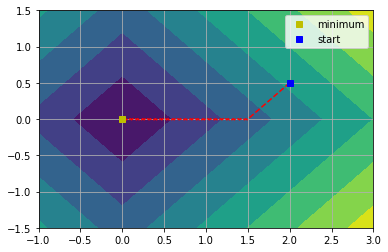

In [5]:
reg_l1 = np.linalg.norm(t, ord=1, axis=1).reshape(t1.shape)

init_theta = np.array([[2.0], [0.5]])
theta = init_theta
alpha = 0.3
lr = 0.05
path = [theta]
for _ in range(200):
    gradients = alpha * np.sign(theta)
    theta = theta - lr * gradients
    path.append(theta)
path = np.array(path)

min_idx = np.unravel_index(np.argmin(reg_l1), reg_l1.shape)
t1_min, t2_min = t1[min_idx], t2[min_idx]
    
plt.figure()
plt.contourf(t1, t2, reg_l1)
plt.plot(path[:, 0], path[:, 1], 'r--')
plt.plot(t1_min, t2_min, 'ys', label='minimum')
plt.plot(init_theta[0], init_theta[1], 'bs', label='start')
plt.axis([-1, 3, -1.5, 1.5])
plt.grid(True)
plt.legend()
plt.show()

In [6]:
xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * xr[:, :1] + 0.5 * xr[:, 1:]
j = (1/len(xr) * np.sum((t.dot(xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

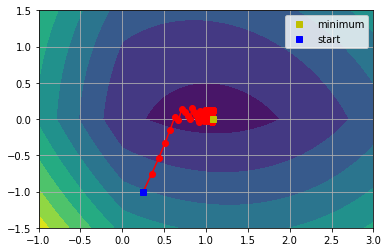

In [7]:
j_l1 = j + 2 * reg_l1

init_theta = np.array([[0.25], [-1]])
theta = init_theta
alpha = 2
lr = 0.05
path = [theta]
for _ in range(200):
    gradients = 1 * 2/len(xr) * xr.T.dot(xr.dot(theta) - yr) + alpha * np.sign(theta)
    theta = theta - lr * gradients
    path.append(theta)
path = np.array(path)

min_idx = np.unravel_index(np.argmin(j_l1), j_l1.shape)
t1_min, t2_min = t1[min_idx], t2[min_idx]

plt.contourf(t1, t2, j_l1)
plt.plot(path[:, 0], path[:, 1], color='r', marker='o')
plt.plot(t1_min, t2_min, 'ys', label='minimum')
plt.plot(init_theta[0], init_theta[1], 'bs', label='start')
plt.axis([-1, 3, -1.5, 1.5])
plt.grid(True)
plt.legend()
plt.show()

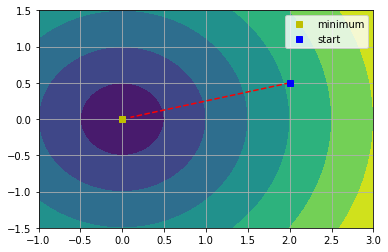

In [8]:
reg_l2 = np.linalg.norm(t, ord=2, axis=1).reshape(t1.shape)

init_theta = np.array([[2.0], [0.5]])
theta = init_theta
alpha = 0.3
lr = 0.05
path = [theta]
for _ in range(200):
    gradients = alpha * theta
    theta = theta - lr * gradients
    path.append(theta)
path = np.array(path)

min_idx = np.unravel_index(np.argmin(reg_l1), reg_l1.shape)
t1_min, t2_min = t1[min_idx], t2[min_idx]
    
plt.figure()
plt.contourf(t1, t2, reg_l2)
plt.plot(path[:, 0], path[:, 1], 'r--')
plt.plot(t1_min, t2_min, 'ys', label='minimum')
plt.plot(init_theta[0], init_theta[1], 'bs', label='start')
plt.axis([-1, 3, -1.5, 1.5])
plt.grid(True)
plt.legend()
plt.show()

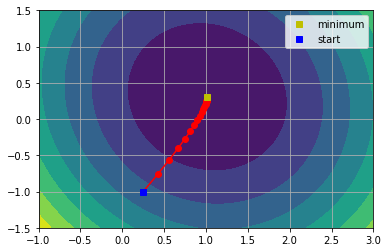

In [9]:
j_l2 = j +  2 * 0.5 * reg_l2 ** 2

init_theta = np.array([[0.25], [-1]])
theta = init_theta
alpha = 2
lr = 0.05
path = [theta]
for _ in range(200):
    gradients = 1 * 2/len(xr) * xr.T.dot(xr.dot(theta) - yr) + alpha * theta
    theta = theta - lr * gradients
    path.append(theta)
path = np.array(path)

min_idx = np.unravel_index(np.argmin(j_l2), j_l2.shape)
t1_min, t2_min = t1[min_idx], t2[min_idx]

plt.contourf(t1, t2, j_l2)
plt.plot(path[:, 0], path[:, 1], color='r', marker='o')
plt.plot(t1_min, t2_min, 'ys', label='minimum')
plt.plot(init_theta[0], init_theta[1], 'bs', label='start')
plt.axis([-1, 3, -1.5, 1.5])
plt.grid(True)
plt.legend()
plt.show()